In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
non_potential_customers = pd.read_csv('/Users/castle/Desktop/中研院/程式/non_potential_customers_data.csv')

/Users/castle/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
non_potential_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751889 entries, 0 to 751888
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   u_userId              751889 non-null  int64 
 1   u_phonePrice          751889 non-null  int64 
 2   u_browserLifeCycle    751889 non-null  int64 
 3   u_browserMode         751889 non-null  int64 
 4   u_feedLifeCycle       751889 non-null  int64 
 5   u_refreshTimes        751889 non-null  int64 
 6   u_newsCatInterests    751889 non-null  object
 7   u_newsCatDislike      751889 non-null  object
 8   u_newsCatInterestsST  751889 non-null  object
 9   u_click_ca2_news      751889 non-null  object
 10  i_docId               751889 non-null  object
 11  i_s_sourceId          751889 non-null  object
 12  i_regionEntity        751889 non-null  int64 
 13  i_cat                 751889 non-null  int64 
 14  i_entities            729245 non-null  object
 15  i_dislikeTimes   

In [53]:
columns_to_drop = ['u_newsCatInterests', 'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news', 'i_docId', 'i_s_sourceId','i_entities']
non_potential_customers_2 = non_potential_customers.drop(columns_to_drop, axis=1)

In [54]:
non_potential_customers_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751889 entries, 0 to 751888
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   u_userId            751889 non-null  int64
 1   u_phonePrice        751889 non-null  int64
 2   u_browserLifeCycle  751889 non-null  int64
 3   u_browserMode       751889 non-null  int64
 4   u_feedLifeCycle     751889 non-null  int64
 5   u_refreshTimes      751889 non-null  int64
 6   i_regionEntity      751889 non-null  int64
 7   i_cat               751889 non-null  int64
 8   i_dislikeTimes      751889 non-null  int64
 9   i_upTimes           751889 non-null  int64
 10  i_dtype             751889 non-null  int64
 11  e_ch                751889 non-null  int64
 12  e_m                 751889 non-null  int64
 13  e_po                751889 non-null  int64
 14  e_pl                751889 non-null  int64
 15  e_rn                751889 non-null  int64
 16  e_section           

In [55]:
non_potential_customers_2.nunique()

u_userId              114826
u_phonePrice               7
u_browserLifeCycle         8
u_browserMode              8
u_feedLifeCycle            8
u_refreshTimes            10
i_regionEntity           364
i_cat                    207
i_dislikeTimes            10
i_upTimes                 10
i_dtype                    5
e_ch                      19
e_m                      262
e_po                      27
e_pl                    3089
e_rn                      99
e_section                  2
e_et                    3561
label                      2
cillabel                   2
pro                       35
dtype: int64

In [56]:
# 將 e_et 欄位轉換為日期時間格式
non_potential_customers_2['e_et'] = pd.to_datetime(non_potential_customers_2['e_et'], format='%Y%m%d%H%M')

non_potential_customers_2['e_et'].describe()

/var/folders/06/9_bpqdqs2v3cnl8l1lfqkvc00000gn/T/ipykernel_31463/291263203.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  non_potential_customers_2['e_et'].describe()


count                  751889
unique                   3561
top       2022-06-09 12:28:00
freq                      771
first     2022-06-03 00:13:00
last      2022-06-09 23:29:00
Name: e_et, dtype: object

In [57]:
non_potential_customers_2['e_et'].head(50)

0    2022-06-08 15:21:00
1    2022-06-08 15:21:00
2    2022-06-08 15:21:00
3    2022-06-08 15:21:00
4    2022-06-08 15:22:00
5    2022-06-08 15:21:00
6    2022-06-08 15:22:00
7    2022-06-08 15:21:00
8    2022-06-08 15:20:00
9    2022-06-08 15:22:00
10   2022-06-08 15:21:00
11   2022-06-03 05:15:00
12   2022-06-03 21:27:00
13   2022-06-03 05:18:00
14   2022-06-03 05:21:00
15   2022-06-03 05:19:00
16   2022-06-03 05:17:00
17   2022-06-03 05:20:00
18   2022-06-03 05:16:00
19   2022-06-03 05:18:00
20   2022-06-03 05:19:00
21   2022-06-03 05:20:00
22   2022-06-07 10:23:00
23   2022-06-06 22:24:00
24   2022-06-09 21:17:00
25   2022-06-09 21:16:00
26   2022-06-08 09:21:00
27   2022-06-03 12:20:00
28   2022-06-05 17:20:00
29   2022-06-08 16:20:00
30   2022-06-08 10:27:00
31   2022-06-03 22:22:00
32   2022-06-08 14:25:00
33   2022-06-08 14:25:00
34   2022-06-08 23:23:00
35   2022-06-08 23:23:00
36   2022-06-08 08:27:00
37   2022-06-04 19:26:00
38   2022-06-08 13:13:00
39   2022-06-07 00:26:00


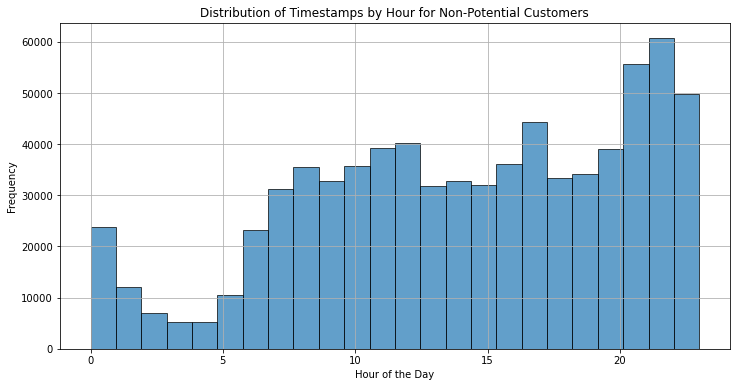

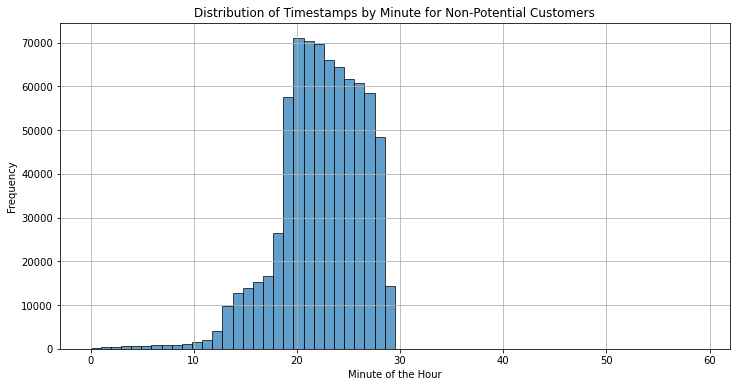

In [58]:
# 繪製時間分佈圖
non_potential_customers_2['hour'] = non_potential_customers_2['e_et'].dt.hour
non_potential_customers_2['minute'] = non_potential_customers_2['e_et'].dt.minute

plt.figure(figsize=(12, 6))
plt.hist(non_potential_customers_2['hour'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Hour for Non-Potential Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(non_potential_customers_2['minute'], bins=60, alpha=0.7,  edgecolor='black')
plt.xlabel('Minute of the Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Minute for Non-Potential Customers')
plt.grid(True)
plt.show()

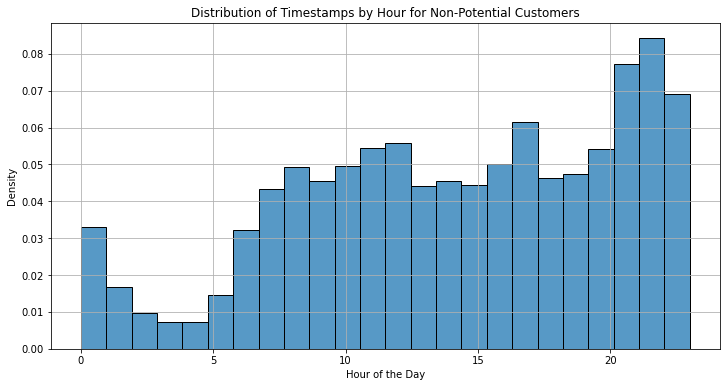

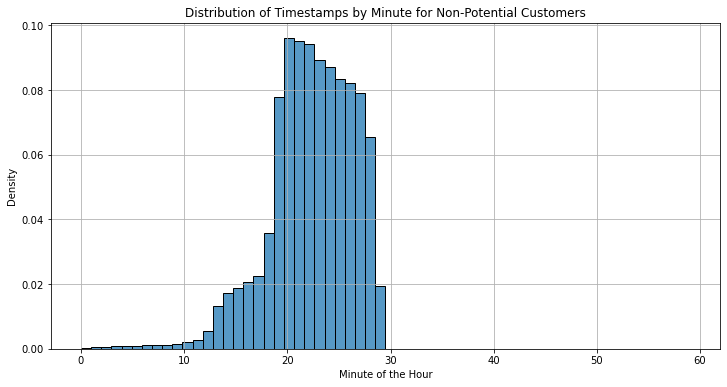

In [59]:
# 繪製小時分佈的密度圖
plt.figure(figsize=(12, 6))
sns.histplot(non_potential_customers_2['hour'], bins=24, stat="density")
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Distribution of Timestamps by Hour for Non-Potential Customers')
plt.grid(True)
plt.show()

# 繪製分鐘分佈的密度圖
plt.figure(figsize=(12, 6))
sns.histplot(non_potential_customers_2['minute'], bins=60, stat="density")
plt.xlabel('Minute of the Hour')
plt.ylabel('Density')
plt.title('Distribution of Timestamps by Minute for Non-Potential Customers')
plt.grid(True)
plt.show()

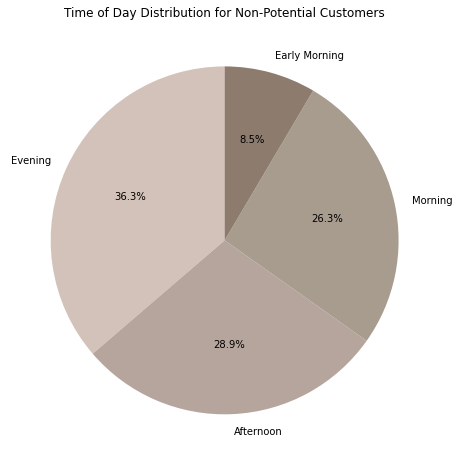

In [60]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# 時間段分組
non_potential_customers_2['time_of_day'] = non_potential_customers_2['hour'].apply(time_of_day)

# 計算每個時間段的頻率
time_of_day_counts = non_potential_customers_2['time_of_day'].value_counts()

# 繪製圓餅圖
colors = ['#D3C2B9', '#B6A59D', '#A79C8E', '#8D7B6E']
plt.figure(figsize=(8, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Time of Day Distribution for Non-Potential Customers')
plt.show()

0       188
1       308
2       440
3       579
4       552
5       721
6       843
7       825
8       927
9      1175
10     1477
11     2089
12     4081
13     9674
14    12846
15    13941
16    15219
17    16691
18    26425
19    57525
20    71036
21    70284
22    69687
23    66038
24    64388
25    61810
26    60750
27    58398
28    48488
29    14439
59       45
Name: minute, dtype: int64


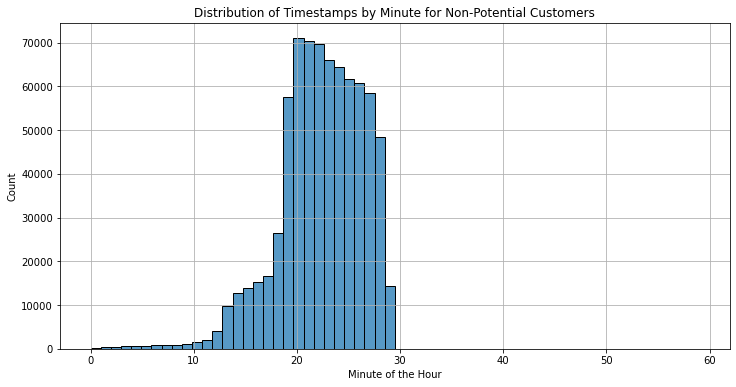

In [61]:
# 計算 unique 值和頻率
minute_counts = non_potential_customers_2['minute'].value_counts().sort_index()

print(minute_counts)

# 繪製分鐘分佈的直方圖
plt.figure(figsize=(12, 6))
sns.histplot(non_potential_customers_2['minute'], bins=60, kde=False, stat="count")
plt.xlabel('Minute of the Hour')
plt.ylabel('Count')
plt.title('Distribution of Timestamps by Minute for Non-Potential Customers')
plt.grid(True)
plt.show()

In [63]:
non_potential_customers_2['day'] = non_potential_customers_2['e_et'].dt.day
# 計算 unique 值和頻率
day_counts = non_potential_customers_2['day'].value_counts().sort_index()
print(day_counts)


3    105361
4    120836
5    120685
6     94105
7    106804
8    103496
9    100602
Name: day, dtype: int64


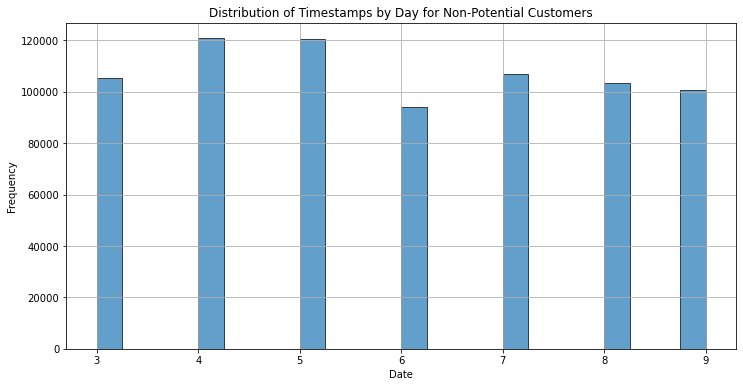

In [64]:
# 繪製日分佈的曲線圖
plt.figure(figsize=(12, 6))
plt.hist(non_potential_customers_2['day'], bins=24, alpha=0.7, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps by Day for Non-Potential Customers')
plt.grid(True)
plt.show()

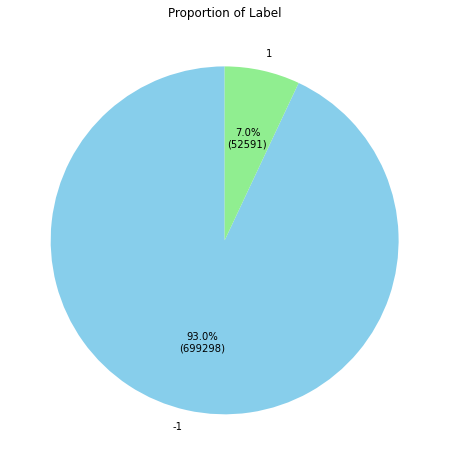

In [65]:
label_counts=non_potential_customers_2['label'].value_counts()
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format
# 繪製圓餅圖
plt.figure(figsize=(8, 8))
label_counts.plot.pie(autopct=autopct_format(label_counts), startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Label')
plt.ylabel('')
plt.show()

In [66]:
# 確認月份數
non_potential_customers_2['month'] = non_potential_customers_2['e_et'].dt.month
month_counts = non_potential_customers_2['month'].value_counts().sort_index()
print(month_counts)

6    751889
Name: month, dtype: int64


In [67]:
# 按 user_id 和 e_et 排序
non_potential_customers_6 = non_potential_customers_2.sort_values(by=['u_userId', 'e_et'])

# 計算每個 user_id 最早和最晚 e_et 之間的時間差
time_spent = non_potential_customers_6.groupby('u_userId')['e_et'].agg(['min', 'max'])
time_spent['time_diff'] = (time_spent['max'] - time_spent['min']).dt.total_seconds() / 60  # 轉換為分鐘

In [69]:
time_spent['time_diff'].value_counts()

0.0       52946
1.0        4924
2.0        1936
3.0        1158
4.0         902
          ...  
3101.0        1
4598.0        1
4814.0        1
8506.0        1
192.0         1
Name: time_diff, Length: 5611, dtype: int64

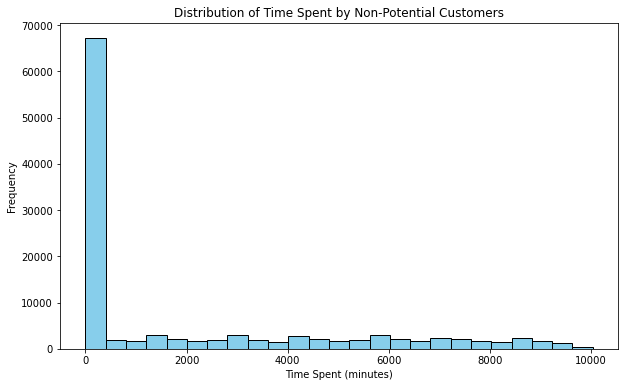

In [70]:
# 繪製時間長度的分佈直方圖
plt.figure(figsize=(10, 6))
plt.hist(time_spent['time_diff'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent by Non-Potential Customers')
plt.show()